# Project Introduction

This project focuses on **car detection** using the **YOLOv8** object detection model. The goal is to train a model that can identify and locate various objects related to cars and traffic, such as traffic lights and speed limit signs, within images. The dataset used for training and evaluation contains a variety of images with annotations for these objects. By training a YOLOv8 model on this dataset, we aim to build a system capable of accurately detecting these objects in new, unseen images or video streams, which can be useful for applications like autonomous driving or traffic monitoring.

## Install kaggle

Install the Kaggle library.


In [6]:
# Install the kaggle package using pip
%pip install kaggle

## Upload kaggle api key

Upload the `kaggle.json` file to allow downloading datasets from Kaggle.


In [7]:
# Create the .kaggle directory, copy the kaggle.json file, and set the permissions of the kaggle.json file
import os
import shutil

home_dir = os.path.expanduser('~')
kaggle_dir = os.path.join(home_dir, '.kaggle')
os.makedirs(kaggle_dir, exist_ok=True)
shutil.copy('/content/kaggle.json', kaggle_dir)
kaggle_json_path = os.path.join(kaggle_dir, 'kaggle.json')
os.chmod(kaggle_json_path, 0o600)

## Download dataset



In [8]:
# Download the specified dataset from Kaggle using the Kaggle API
!kaggle datasets download -d pkdarabi/cardetection

Dataset URL: https://www.kaggle.com/datasets/pkdarabi/cardetection
License(s): Attribution 4.0 International (CC BY 4.0)
cardetection.zip: Skipping, found more recently modified local copy (use --force to force download)


## Extract dataset



In [9]:
# Extract the dataset from the downloaded zip file
import zipfile

zip_file_path = 'cardetection.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall()

## Load dataset




In [10]:
# Load the data from the YAML file into a pandas DataFrame
import pandas as pd
import yaml

file_path = '/content/car/data.yaml'
with open(file_path, 'r') as file:
    data = yaml.safe_load(file)

df = pd.DataFrame([data])

## Visualize the number of classes

Create a bar chart to visualize the number of classes in the dataset.

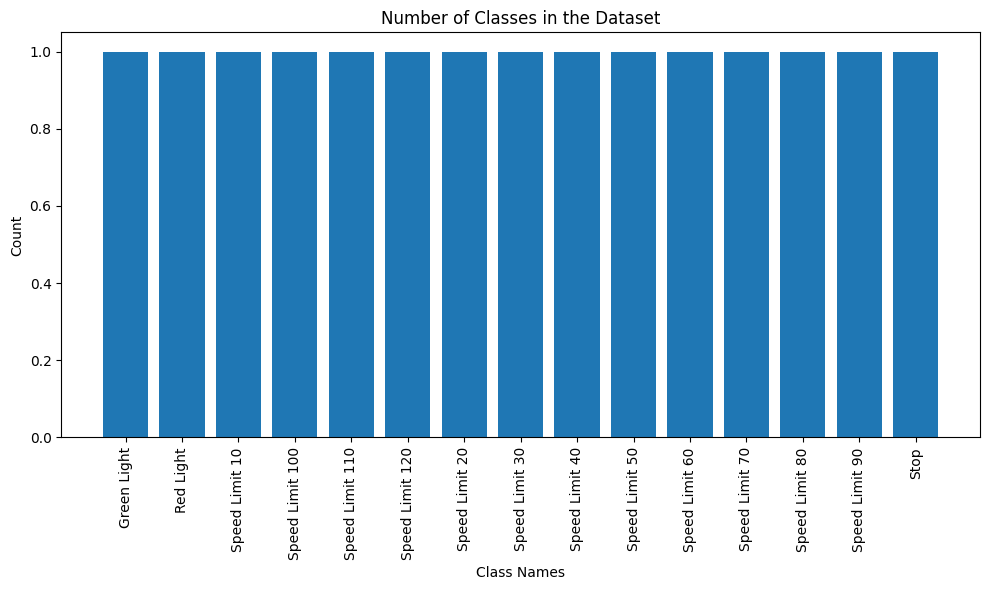

In [11]:
import matplotlib.pyplot as plt

# Get the number of classes
num_classes = data['nc']
class_names = data['names']

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_names, [1] * num_classes)  # Assuming each name represents one class
plt.xlabel('Class Names')
plt.ylabel('Count')
plt.title('Number of Classes in the Dataset')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Install necessary libraries

Install the YOLO library and any other required dependencies.

In [20]:
# Install the ultralytics package using pip
%pip install ultralytics

# Check the installed version of ultralytics
import ultralytics
print(f"Ultralytics version: {ultralytics.__version__}")

Ultralytics version: 8.3.198


## Train the yolo model

Train the chosen YOLO model on the prepared dataset.

In [21]:
from ultralytics import YOLO

# Load the chosen YOLOv8s model weights
model = YOLO('yolov8s.pt')

# Define the path to the data configuration file
data_yaml_path = '/content/car/data.yaml'

# Train the model
# We will train for a small number of epochs for demonstration purposes.
# For better results, a higher number of epochs (e.g., 100) is recommended.
results = model.train(data=data_yaml_path, epochs=10)

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, 

## Evaluate the trained model

 Evaluate the trained YOLOv8s model on the validation dataset to assess its performance using metrics such as mAP.

In [22]:
# Evaluate the trained model on the validation set
# The results of the evaluation will be printed to the console.
evaluation_results = model.val()

# You can access specific metrics from the evaluation_results object
# For example:
# print(f"\nmAP@0.5: {evaluation_results.results_dict['metrics/mAP50(B)'].item()}")
# print(f"mAP@0.5:0.95: {evaluation_results.results_dict['metrics/mAP50-95(B)'].item()}")

Ultralytics 8.3.198 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,131,389 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 859.5±345.9 MB/s, size: 19.7 KB)
val: Scanning /content/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 801/801 1.5Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 51/51 4.3it/s 11.8s
                   all        801        944      0.935      0.893      0.951      0.815
           Green Light         87        122      0.786      0.755      0.818      0.468
             Red Light         74        108      0.814       0.77      0.805      0.478
       Speed Limit 100         52         52      0.934      0.942      0.985      0.893
       Speed Limit 110         17         17      0.936       0.86      0.973      0.896
       Speed Limit 120         60         60        

## Infer using the trained model


Use the trained model to perform object detection on new images or videos.

Using sample image for inference: /content/car/test/images/FisheyeCamera_1_00476_png.rf.9039468fbc1dab58476b697e479807f8.jpg

image 1/1 /content/car/test/images/FisheyeCamera_1_00476_png.rf.9039468fbc1dab58476b697e479807f8.jpg: 640x640 2 Green Lights, 16.3ms
Speed: 3.4ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


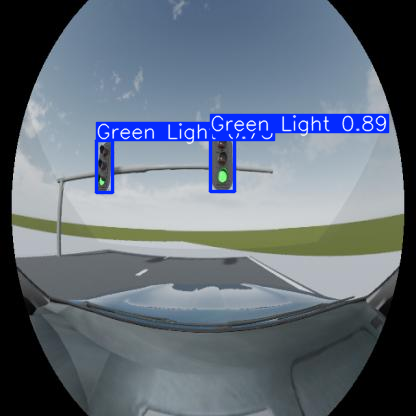

Detected: Class ID 0, Confidence: 0.89, BBox: [210.1849365234375, 132.23255920410156, 234.11602783203125, 191.32789611816406]
Detected: Class ID 0, Confidence: 0.73, BBox: [96.58232116699219, 140.54710388183594, 112.4190902709961, 192.26669311523438]


In [24]:
import os
from ultralytics import YOLO

# Load the best weights from the trained model
best_model_path = '/content/runs/detect/train2/weights/best.pt' # Update with the actual path to your best weights
model = YOLO(best_model_path)

# Perform inference on a sample image
# Replace 'path/to/your/sample_image.jpg' with the actual path to an image you want to test
# You can find sample images in the 'test/images' directory of the extracted dataset

test_images_dir = '/content/car/test/images'
test_image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.jpg') or f.endswith('.png')]

if test_image_files:
    sample_image_file = test_image_files[0]
    sample_image_path = os.path.join(test_images_dir, sample_image_file)
    print(f"Using sample image for inference: {sample_image_path}")
    results = model(sample_image_path)

    # The 'results' object contains the detection results. You can access and visualize them.
    # For example, to show the predicted image:
    results[0].show()

    # To print the detected boxes, classes, and confidence scores:
    for r in results:
        boxes = r.boxes
        for box in boxes:
            class_id = int(box.cls)
            confidence = float(box.conf)
            xyxy = box.xyxy[0].tolist()
            print(f"Detected: Class ID {class_id}, Confidence: {confidence:.2f}, BBox: {xyxy}")
else:
    print(f"No image files found in {test_images_dir} for inference.")

## Visualize Inference Results on Multiple Test Images


Perform inference on multiple images from the test set and visualize the results.

Performing inference on 638 test images...

Inferring on image: /content/car/test/images/FisheyeCamera_1_00476_png.rf.9039468fbc1dab58476b697e479807f8.jpg

image 1/1 /content/car/test/images/FisheyeCamera_1_00476_png.rf.9039468fbc1dab58476b697e479807f8.jpg: 640x640 2 Green Lights, 16.3ms
Speed: 2.8ms preprocess, 16.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


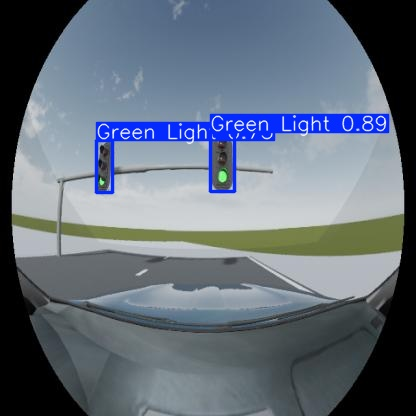

Detected objects:
- Green Light, Confidence: 0.89, BBox: [210.1849365234375, 132.23255920410156, 234.11602783203125, 191.32789611816406]
- Green Light, Confidence: 0.73, BBox: [96.58232116699219, 140.54710388183594, 112.4190902709961, 192.26669311523438]

Inferring on image: /content/car/test/images/00008_00012_00022_png.rf.a76810c64a1c1a3def5cc808bb562890.jpg

image 1/1 /content/car/test/images/00008_00012_00022_png.rf.a76810c64a1c1a3def5cc808bb562890.jpg: 640x640 1 Speed Limit 120, 16.2ms
Speed: 2.2ms preprocess, 16.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


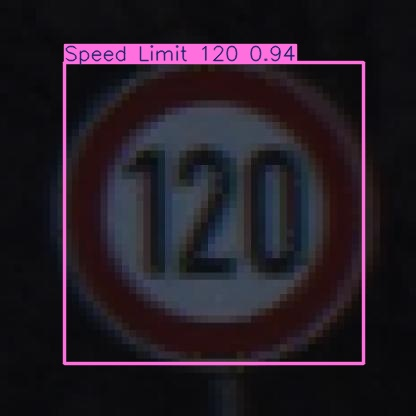

Detected objects:
- Speed Limit 120, Confidence: 0.94, BBox: [64.87535858154297, 62.007503509521484, 363.64776611328125, 363.1748352050781]

Inferring on image: /content/car/test/images/000599_jpg.rf.87f4886233a457df94743a34ee410218.jpg

image 1/1 /content/car/test/images/000599_jpg.rf.87f4886233a457df94743a34ee410218.jpg: 640x640 1 Speed Limit 80, 16.2ms
Speed: 2.1ms preprocess, 16.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


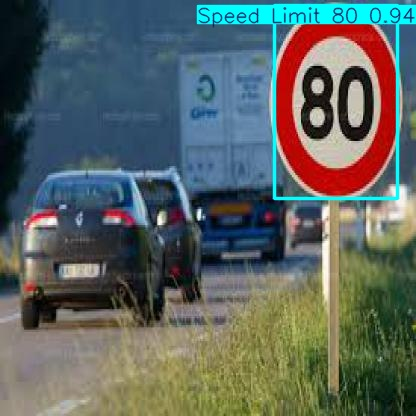

Detected objects:
- Speed Limit 80, Confidence: 0.94, BBox: [274.855712890625, 5.263238430023193, 397.5425109863281, 198.39511108398438]

Inferring on image: /content/car/test/images/00003_00035_00028_png.rf.ee8da916ee92d6dc7e62eedaf09a79e4.jpg

image 1/1 /content/car/test/images/00003_00035_00028_png.rf.ee8da916ee92d6dc7e62eedaf09a79e4.jpg: 640x640 1 Speed Limit 60, 16.2ms
Speed: 3.2ms preprocess, 16.2ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


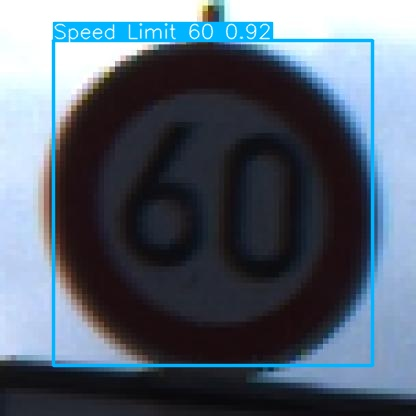

Detected objects:
- Speed Limit 60, Confidence: 0.92, BBox: [53.07556915283203, 40.88568878173828, 372.2041320800781, 365.4308776855469]

Inferring on image: /content/car/test/images/000689_jpg.rf.e7eb671b04e54cabccbc491dc3087e13.jpg

image 1/1 /content/car/test/images/000689_jpg.rf.e7eb671b04e54cabccbc491dc3087e13.jpg: 640x640 1 Speed Limit 80, 16.2ms
Speed: 3.3ms preprocess, 16.2ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


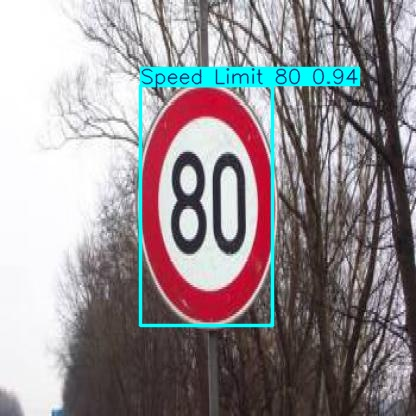

Detected objects:
- Speed Limit 80, Confidence: 0.94, BBox: [140.06185913085938, 85.12470245361328, 272.0603332519531, 325.94818115234375]

Inferring on image: /content/car/test/images/road576_png.rf.f46db39f9f64118df1377c6196897c25.jpg

image 1/1 /content/car/test/images/road576_png.rf.f46db39f9f64118df1377c6196897c25.jpg: 640x640 1 Speed Limit 40, 16.3ms
Speed: 3.2ms preprocess, 16.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


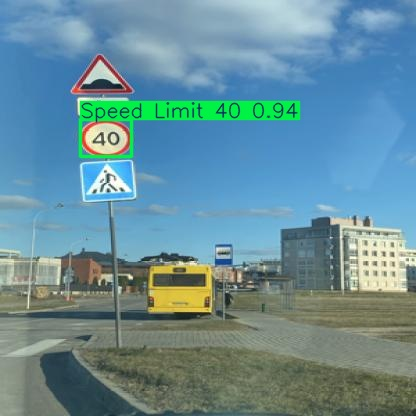

Detected objects:
- Speed Limit 40, Confidence: 0.94, BBox: [80.11136627197266, 119.56482696533203, 131.828125, 156.85633850097656]

Inferring on image: /content/car/test/images/road633_png.rf.282d128c502ba602126742a5064cd054.jpg

image 1/1 /content/car/test/images/road633_png.rf.282d128c502ba602126742a5064cd054.jpg: 640x640 1 Stop, 16.3ms
Speed: 3.2ms preprocess, 16.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


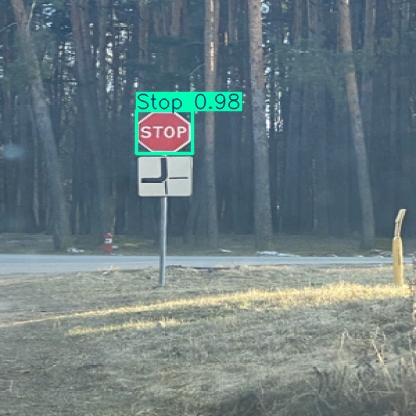

Detected objects:
- Stop, Confidence: 0.98, BBox: [136.52883911132812, 110.56702423095703, 192.29513549804688, 153.46115112304688]

Inferring on image: /content/car/test/images/road62_png.rf.b3288434b3cf3e2b6d2f057c1f5a0502.jpg

image 1/1 /content/car/test/images/road62_png.rf.b3288434b3cf3e2b6d2f057c1f5a0502.jpg: 640x640 1 Stop, 16.2ms
Speed: 3.3ms preprocess, 16.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


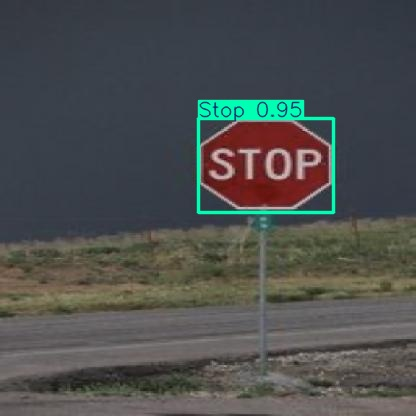

Detected objects:
- Stop, Confidence: 0.95, BBox: [198.9731903076172, 118.15882110595703, 333.9493408203125, 212.4263153076172]

Inferring on image: /content/car/test/images/643854b9-b9d9-4b74-99fb-830fde4a0b74_jpg.rf.4d252deec56db095b1acab7c1c0f1bdc.jpg

image 1/1 /content/car/test/images/643854b9-b9d9-4b74-99fb-830fde4a0b74_jpg.rf.4d252deec56db095b1acab7c1c0f1bdc.jpg: 640x640 1 Red Light, 16.3ms
Speed: 3.2ms preprocess, 16.3ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


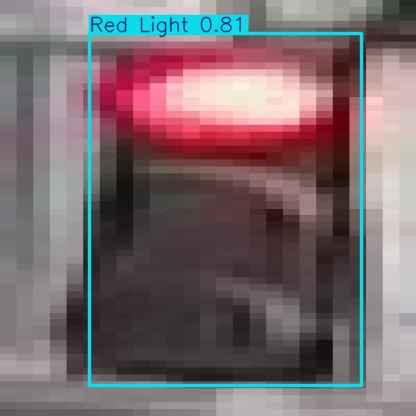

Detected objects:
- Red Light, Confidence: 0.81, BBox: [89.54508209228516, 33.720455169677734, 361.96209716796875, 385.3238220214844]

Inferring on image: /content/car/test/images/road355_png.rf.c43f3ac674a10af91051d8cb228747ad.jpg

image 1/1 /content/car/test/images/road355_png.rf.c43f3ac674a10af91051d8cb228747ad.jpg: 640x640 1 Speed Limit 40, 14.1ms
Speed: 3.2ms preprocess, 14.1ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


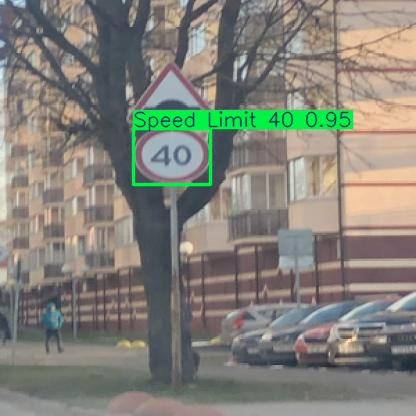

Detected objects:
- Speed Limit 40, Confidence: 0.95, BBox: [133.17343139648438, 128.19728088378906, 210.56381225585938, 184.08885192871094]


In [25]:
import os
from ultralytics import YOLO
from IPython.display import display, Image

# Load the best weights from the trained model
best_model_path = '/content/runs/detect/train2/weights/best.pt' # Update with the actual path if needed
model = YOLO(best_model_path)

test_images_dir = '/content/car/test/images'
test_image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.jpg') or f.endswith('.png')]

if test_image_files:
    print(f"Performing inference on {len(test_image_files)} test images...")
    # Limit to a few images for demonstration
    for i, image_file in enumerate(test_image_files[:10]): # Visualize first 10 images
        sample_image_path = os.path.join(test_images_dir, image_file)
        print(f"\nInferring on image: {sample_image_path}")

        # Perform inference
        results = model(sample_image_path)

        # Display the resulting image with detections
        if results and results[0].orig_img is not None:
            # Save the result image temporarily to display it
            result_img_path = f'/content/result_image_{i}.jpg'
            results[0].save(result_img_path)
            display(Image(filename=result_img_path))
            os.remove(result_img_path) # Clean up the temporary file
        else:
            print(f"Could not get result image for {sample_image_path}")

        # Print the detected boxes, classes, and confidence scores
        for r in results:
            boxes = r.boxes
            if boxes:
                print("Detected objects:")
                for box in boxes:
                    class_id = int(box.cls)
                    confidence = float(box.conf)
                    xyxy = box.xyxy[0].tolist()
                    # Get class name from the data dictionary
                    class_name = data['names'][class_id] if 'names' in data and class_id < len(data['names']) else f"Class {class_id}"
                    print(f"- {class_name}, Confidence: {confidence:.2f}, BBox: {xyxy}")
            else:
                print("No objects detected.")

else:
    print(f"No image files found in {test_images_dir} for inference.")

## Visualize Inference Results on Remaining Test Images


Perform inference on the remaining images from the test set and visualize the results.

In [26]:
import os
from ultralytics import YOLO
from IPython.display import display, Image

# Load the best weights from the trained model
best_model_path = '/content/runs/detect/train2/weights/best.pt' # Update with the actual path if needed
model = YOLO(best_model_path)

test_images_dir = '/content/car/test/images'
test_image_files = [f for f in os.listdir(test_images_dir) if f.endswith('.jpg') or f.endswith('.png')]

if test_image_files:
    print(f"Continuing inference on the remaining {len(test_image_files) - 10} test images...")
    # Continue from the 11th image for visualization
    for i, image_file in enumerate(test_image_files[10:]):
        sample_image_path = os.path.join(test_images_dir, image_file)
        print(f"\nInferring on image: {sample_image_path}")

        # Perform inference
        results = model(sample_image_path)

        # Display the resulting image with detections
        if results and results[0].orig_img is not None:
            # Save the result image temporarily to display it
            result_img_path = f'/content/result_image_{i+10}.jpg'
            results[0].save(result_img_path)
            display(Image(filename=result_img_path))
            os.remove(result_img_path) # Clean up the temporary file
        else:
            print(f"Could not get result image for {sample_image_path}")

        # Print the detected boxes, classes, and confidence scores
        for r in results:
            boxes = r.boxes
            if boxes:
                print("Detected objects:")
                for box in boxes:
                    class_id = int(box.cls)
                    confidence = float(box.conf)
                    xyxy = box.xyxy[0].tolist()
                    # Get class name from the data dictionary
                    class_name = data['names'][class_id] if 'names' in data and class_id < len(data['names']) else f"Class {class_id}"
                    print(f"- {class_name}, Confidence: {confidence:.2f}, BBox: {xyxy}")
            else:
                print("No objects detected.")

else:
    print(f"No image files found in {test_images_dir} for inference.")

Output hidden; open in https://colab.research.google.com to view.